#Step 1: Blob detection

The `lentil.png` image is a greyscale image from constructed from the red light and near infrared light channels of a multispectral camera.  (Thanks to Dr. Kirstin Bett, Dept. of Plant Sciences, College of Agriculture for the image!).  The bright blobs you see in the middle section of the image are clusters of lentil plants called plots (each plot is a different genetic lineage).  These are areas of interest for plant breeders because they want to analyze the patches of plant, while ignoring the background soil.  To do that in an automated algorithm, we first have to find the plots!

Use one of the blob detection functions described at the end of the Topic 5 lecture slides to detect the blobs in the `lentil.png` image.  Obtain the best result you can from any one of the three available functions (in `skimage.feature`), namely `blob_log()`, `blob_dog()`, or `blob_doh()`.  Try the different functions and experiment with their parameters.   Don't worry too much about the correctness of the blobs at the very top and very bottom that are outside the area of the field trial.  These are not areas of interest.

For your best result, draw the blobs as circles on the output image and display the result.    The last slide of Topic 5 gives you an example of some code that does this.  Sample output is shown in the assignment description document.

Sample output is given in the assignment document but be aware that it is not necessarily representative of the quality of the blob detection that you might achieve because I did not spend more than 5 minutes tweaking the parameters.  You should be able to do at least as well, but possibly also better.  

_Hint: as usual, it is suggested that you convert the image to dtype `float` before processing._

_Hint: the image is pretty big, so you'll need to set the figure size to something larger.  For me `plt.figure(figsize=(20,7))` worked well, but I have an almost 4K display.  Smaller may work for you._




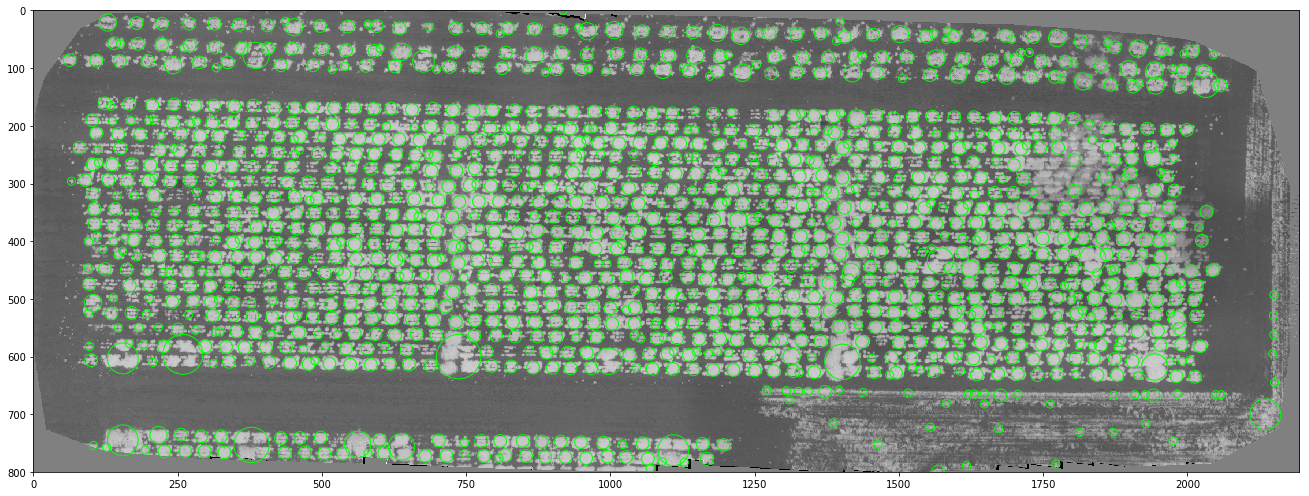

In [31]:
import skimage.io as io
import skimage.util as util
import skimage.feature as feat
import matplotlib.pyplot as plt
import numpy as np
import math as m
import skimage.color as color

# Write your code here.  It shouldn't take much.  Adapt the example on the last slide of the Topic 5 lecture notes.
myimage_lentil = io.imread('lentil.png')

if myimage_lentil.dtype == np.uint8:
    myimage_lentil = util.img_as_float(myimage_lentil)
    
blobs_log = feat.blob_log(myimage_lentil, min_sigma=5, max_sigma=30, num_sigma=10, threshold=.1) 
blobs_log[:, 2] = blobs_log[:, 2] * m.sqrt(2)

plt.figure(figsize=(20,7))
plt.imshow(myimage_lentil, cmap='gray', vmin=0, vmax=1)

for row in blobs_log:
    c = plt.Circle( (row[1], row[0]), row[2], color='lime', linewidth=1, fill=False)
    plt.gca().add_patch(c)
    
plt.tight_layout()
plt.show()

# Step 2:  Thinking and Analysis

### Answer these questions, right here in this block.

1.  What properties of the image did you consider when selecting parameters for blob detection?  

	_Your answer:_ Sizes of blobs need to be detected, and differences of intensities between blobs and surroundings. 

2.  What kinds of errors (in terms of detecting the plots) did you observe in the detected blobs?  

	_Your answer:_ Some objects overlapping with or too close to others are recognized as single blobs.

3.  How might you mitigate those errors as a post-processing step?

	_Your answer:_ We can apply segmentation algorithms to those large blobs.

